**Table: Matches** ----------   24,625 x 9	

* Match_ID (int): unique ID per match
* Div (str): identifies the division the match was played in (D1 = Bundesliga, D2 = Bundesliga 2, E0 = English Premier League)
* Season (int): Season the match took place in (usually covering the period of August till May of the following year)
* Date (str): Date of the match
* HomeTeam (str): Name of the home team
* AwayTeam (str): Name of the away team
* FTHG (int) (Full Time Home Goals): Number of goals scored by the home team
* FTAG (int) (Full Time Away Goals): Number of goals scored by the away team
* FTR (str) (Full Time Result): 3-way result of the match (H = Home Win, D = Draw, A = Away Win)

In [35]:
df_matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


**Table: Teams** ---------- 468 x 8

* Season (str): Football season for which the data is valid
* TeamName (str): Name of the team the data concerns
* KaderHome (str): Number of Players in the squad
* AvgAgeHome (str): Average age of players
* ForeignPlayersHome (str): Number of foreign players (non-German, non-English respectively) playing for the team
* OverallMarketValueHome (str): Overall market value of the team pre-season in EUR (based on data from transfermarkt.de)
* AvgMarketValueHome (str): Average market value (per player) of the team pre-season in EUR (based on data from transfermarkt.de)
* StadiumCapacity (str): Maximum stadium capacity of the team's home stadium

In [29]:
df_teams.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


**Table: Unique_Teams** ---------- 128 x 2

* TeamName (str): Name of a team
* Unique_Team_ID (int): Unique identifier for each team

In [30]:
df_unique_teams.head()

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


**Table: Teams_in_Matches** ------------- 49,148 x 2

* Match_ID (int): Unique match ID
* Unique_Team_ID (int): Unique team ID (This table is used to easily retrieve each match a given team has played in)

In [86]:
df_teams_in_matches.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [920]:
c.execute("""select TeamName, Unique_Team_ID, Season, count(*)
             from Unique_Teams
             join Teams_in_Matches
             using (Unique_Team_ID)
             join Matches
             using (Match_ID)
             where Season = 2011
             group by 2;""")
df = pd.DataFrame(c.fetchall())
df.columns = [i[0] for i in c.description]
df.head()

,TeamName,Unique_Team_ID,Season,count(*)
0,Bayern Munich,1,2011,34
1,Dortmund,2,2011,34
2,Leverkusen,3,2011,34
3,Schalke 04,5,2011,34
4,M'gladbach,6,2011,34


In [918]:
import pandas as pd
import matplotlib as plt
import numpy as np
import requests
import json

In [919]:
import sqlite3
conn = sqlite3.connect('database.sqlite')
# dont know if I should use the 'PARSE_COLNAMES' or not
c = conn.cursor()

### What are the names of the teams who show up the most in Teams_in_Matches?

In [126]:
c.execute("""select Unique_Team_ID, TeamName,
             count (*) as Number_of_Matches
             from Teams_in_Matches
             join Unique_Teams
             using (Unique_Team_ID)
             group by 1
             order by 3 desc
             limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = (i[0] for i in c.description)
df

,Unique_Team_ID,TeamName,Number_of_Matches
0,81,Arsenal,920
1,83,Chelsea,920
2,84,Liverpool,920
3,92,Tottenham,920
4,93,Everton,920


### Getting team names into dictionaries

In [921]:
# def get_names():
c.execute("""select TeamName
                 from Unique_Teams;""")
list_teams = []
for i in c.fetchall():
    for e in i:
        list_teams.append(e)
list_teams[:5]

['Bayern Munich', 'Dortmund', 'Leverkusen', 'RB Leipzig', 'Schalke 04']

In [146]:
# def get_names():
list_team_dicts = []
for team in list_teams:
    thing = {'name':team}
    list_team_dicts.append(thing)

In [934]:
list_team_dicts

[{'name': 'Bayern Munich', '_id': ObjectId('5d2633588e0a4f132d56ca60')},
 {'name': 'Dortmund', '_id': ObjectId('5d2633588e0a4f132d56ca61')},
 {'name': 'Leverkusen', '_id': ObjectId('5d2633588e0a4f132d56ca62')},
 {'name': 'RB Leipzig', '_id': ObjectId('5d2633588e0a4f132d56ca63')},
 {'name': 'Schalke 04', '_id': ObjectId('5d2633588e0a4f132d56ca64')},
 {'name': "M'gladbach", '_id': ObjectId('5d2633588e0a4f132d56ca65')},
 {'name': 'Wolfsburg', '_id': ObjectId('5d2633588e0a4f132d56ca66')},
 {'name': 'FC Koln', '_id': ObjectId('5d2633588e0a4f132d56ca67')},
 {'name': 'Hoffenheim', '_id': ObjectId('5d2633588e0a4f132d56ca68')},
 {'name': 'Hertha', '_id': ObjectId('5d2633588e0a4f132d56ca69')},
 {'name': 'Mainz', '_id': ObjectId('5d2633588e0a4f132d56ca6a')},
 {'name': 'Hamburg', '_id': ObjectId('5d2633588e0a4f132d56ca6b')},
 {'name': 'Werder Bremen', '_id': ObjectId('5d2633588e0a4f132d56ca6c')},
 {'name': 'Ein Frankfurt', '_id': ObjectId('5d2633588e0a4f132d56ca6d')},
 {'name': 'Augsburg', '_id': 

### Getting team number of goals

In [687]:
c.execute("""select Season, HomeTeam, count(*) as frq, 
             sum(FTHG) as Goals
             from Matches
             where Season = 2011
             group by 2;""")
df = pd.DataFrame(c.fetchall())
df.columns = [i[0] for i in c.description]
df.head()
# print(len(df['']))

,Season,HomeTeam,frq,Goals
0,2011,Aachen,17,15
1,2011,Arsenal,19,39
2,2011,Aston Villa,19,20
3,2011,Augsburg,17,20
4,2011,Bayern Munich,17,49


In [366]:
goals = []
for i in df['Goals']:
    goals.append(i)
print(len(goals))
goals[:5]

56


[15, 39, 20, 20, 49]

Getting alphabetical list of team names for later iteration and possible upload variables when uploading everything in Mongo.

In [367]:
alph_teams_2011 = []
for i in df.HomeTeam:
    alph_teams_2011.append(i)
print(len(alph_teams_2011))
alph_teams_2011[:5]

56


['Aachen', 'Arsenal', 'Aston Villa', 'Augsburg', 'Bayern Munich']

### Getting total number of wins

In [469]:
c.execute("""select Season, HomeTeam, 
             count(FTR) as Wins
             from Matches
             where Season = 2011 and FTR = "H"
             group by 2
             order by 2;""")
df_wins = pd.DataFrame(c.fetchall())
df_wins.columns = [i[0] for i in c.description]
df_wins.head()

,Season,HomeTeam,Wins
0,2011,Aachen,4
1,2011,Arsenal,12
2,2011,Aston Villa,4
3,2011,Augsburg,6
4,2011,Bayern Munich,14


In [464]:
wins = []
for i in df_wins['Wins']:
    wins.append(i)
wins[:5]

[4, 12, 4, 6, 14]

### Histogram of wins and losses

Getting losses and combining with wins from above.

In [423]:
c.execute("""select Season, HomeTeam, 
             count(FTR) as Losses
             from Matches
             where Season = 2011 and FTR = "A"
             group by 2
             order by 2;""")
df_losses = pd.DataFrame(c.fetchall())
df_losses.columns = [i[0] for i in c.description]
df_losses.head()

,Season,HomeTeam,Losses
0,2011,Aachen,7
1,2011,Arsenal,3
2,2011,Aston Villa,8
3,2011,Augsburg,4
4,2011,Bayern Munich,2


In [437]:
losses = []
for i in df_losses['Losses']:
    losses.append(i)
print(len(losses))
losses[:5]

54


[7, 3, 8, 4, 2]

There are two teams that did not lose any games

In [424]:
losing_teams = []
for i in df_losses['HomeTeam']:
    losing_teams.append(i)

In [426]:
for i in alph_teams_2011:
    if i not in losing_teams:
        print(i)

Hannover
Man City


Had to manually count and insert data (the two zeroes for the teams that never lost a match).

In [460]:
losses = [7, 3, 8, 4, 2, 12, 7, 11, 3, 4, 5, 1, 4, 7, 1, 5, 6, 8, 1, 4, 5, 4, 2, 7, 0, 7, 
 10, 4, 3, 10, 6, 5, 4, 1, 7, 0, 2, 5, 3, 6, 7, 2, 7, 3, 2, 4, 4, 5, 4, 3, 4, 5, 10, 7, 5, 13]

Making a dataframe object to use to create the histograms.

In [470]:
df1 = pd.DataFrame(alph_teams_2011)
df2 = pd.DataFrame(wins)
df3 = pd.DataFrame(losses)
df_for_hist = pd.concat([df1, df2, df3], axis=1)
df_for_hist.columns = ['Team', 'Wins', 'Losses']
df_for_hist.head()

,Team,Wins,Losses
0,Aachen,4,7
1,Arsenal,12,3
2,Aston Villa,4,8
3,Augsburg,6,4
4,Bayern Munich,14,2


Found out that this is not a good way to produce the histograms. Trying something else.

In [963]:
import matplotlib.pyplot as plt
%matplotlib inline

In [603]:
dict_list = []
for a, b, c in zip(alph_teams_2011, wins, losses):
    thing = {a:[b,c]}
    dict_list.append(thing)
i = dict_list[0]

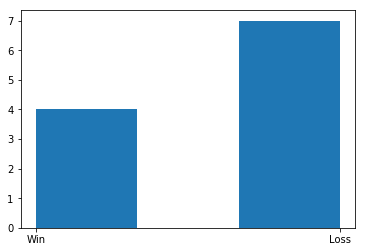

<Figure size 432x288 with 0 Axes>

In [707]:
n = str('Win ' * wins[0])
n = n.split()
o = str('Loss ' * losses[0])
o = o.split()
p = n + o
plt.title = alph_teams_2011[0]
plt.xlabel = 'dasf d'
plt.hist(p, bins=3)
plt.show()
plt.savefig(hist_file + 'image.png')

In [704]:
hist_file = '/Users/plumkes/Course_Materials/section15/dsc-mod-2-lab-online-ds-ft-051319/histograms/'

In [705]:
hist_file

'/Users/plumkes/Course_Materials/section15/dsc-mod-2-lab-online-ds-ft-051319/histograms/'

In [885]:
outcomes # I accidentally deleted the code for this, but it was just a more well put together version of the 
         # code above where I multiplied strings for wins and losses times their respective integers to get a string list
test = outcomes[:3]
test[0]

['Wins',
 'Wins',
 'Wins',
 'Wins',
 'Losses',
 'Losses',
 'Losses',
 'Losses',
 'Losses',
 'Losses',
 'Losses']

Experimented with saving `.png`'s of the histograms as you can see in the commented-out code below. Finally opted to save hists in dictionary format. 

In [997]:
def get_hist(data):
    hist = plt.hist(data, bins=4)
#     plt.savefig(hist_file + 'image{}.png'.format(n))
    plt.close()
    return hist

In [975]:
str(list_of_hists[0])

'(array([4., 0., 0., 7.]), array([0.  , 0.25, 0.5 , 0.75, 1.  ]), <a list of 4 Patch objects>)'

## Getting Weather

In [203]:
import requests
import time
import datetime

Berlin Coordinates:
* 52.519459, 13.405498
* GMT + 02:00

In [669]:
# code credit: https://stackoverflow.com/questions/9637838/convert-string-date-to-timestamp-in-python
# after further research, documentation on Unix for Python: https://docs.python.org/3/library/time.html
def unix_time(date):
    t = date
    p = int(time.mktime(datetime.datetime.strptime(t, "%Y-%m-%d").timetuple()))
    return p

In [670]:
# def get_forecast(lat, long, date):
#     fecha = unix_time(date)
#     response = requests.get('https://api.darksky.net/forecast/542f33bdfe21fc15dcbe5f40326157b6/'
#                             '{},{},{}?exclude=currently,minutely,hourly,alerts,flags'.format(lat, long, fecha))
#     return response.json()

In [671]:
def get_berlin_forecast(date):
    fecha = unix_time(date)
    response = requests.get('https://api.darksky.net/forecast/542f33bdfe21fc15dcbe5f40326157b6/'
                            '52.519459,13.405498,{}?exclude=currently,minutely,hourly,alerts,flags'.format(fecha))
    return response.json()

In [672]:
def precip_in_berlin(date):
    forecast = get_berlin_forecast(date)
    icon = forecast['daily']['data'][0]['icon']
    return icon

In [986]:
c.execute("""select Season, Date, 
                    HomeTeam, AwayTeam, FTR
                    from Matches
                    where Season = 2011;""")
df_weather = pd.DataFrame(c.fetchall())
df_weather.columns = [i[0] for i in c.description]
df_weather.head()

,Season,Date,HomeTeam,AwayTeam,FTR
0,2011,2012-03-31,Nurnberg,Bayern Munich,A
1,2011,2011-12-11,Stuttgart,Bayern Munich,A
2,2011,2011-08-13,Wolfsburg,Bayern Munich,A
3,2011,2011-11-27,Mainz,Bayern Munich,H
4,2011,2012-02-18,Freiburg,Bayern Munich,D


In [676]:
season_2011_dates = list(df.Date)

In [680]:
weather_2011 = []
for date in season_2011_dates:
    weather_2011.append(precip_in_berlin(date))

In [987]:
weather_2011[:5]

['rain',
 'partly-cloudy-day',
 'partly-cloudy-day',
 'partly-cloudy-day',
 'partly-cloudy-day']

In [988]:
df_weather['Weather'] = weather_2011

In [989]:
df_weather.head()

,Season,Date,HomeTeam,AwayTeam,FTR,Weather
0,2011,2012-03-31,Nurnberg,Bayern Munich,A,rain
1,2011,2011-12-11,Stuttgart,Bayern Munich,A,partly-cloudy-day
2,2011,2011-08-13,Wolfsburg,Bayern Munich,A,partly-cloudy-day
3,2011,2011-11-27,Mainz,Bayern Munich,H,partly-cloudy-day
4,2011,2012-02-18,Freiburg,Bayern Munich,D,partly-cloudy-day


### Getting percentage of games won while raining

In [990]:
def win_perc(team):
    played_while_raining = 0
    won_while_raining = 0
    for a, b, c, d in zip(df_weather.HomeTeam, df_weather.AwayTeam, df_weather.FTR, df_weather.Weather):
        if (team == a and d == 'rain'):
            played_while_raining += 1
            if c == 'H':
                won_while_raining += 1
        if (team == b and d == 'rain'):
            played_while_raining += 1
            if c == 'A':
                won_while_raining += 1
    percent_won = round((won_while_raining / played_while_raining) * 100)
    return percent_won

In [874]:
# broken down code used piecemeal to construct above function
team = 'Hannover'
played_while_raining = 0
won_while_raining = 0
for a, b, c, d in zip(df_weather.HomeTeam, df_weather.AwayTeam, df_weather.FTR, df_weather.Weather):    
    if (team == a and d == 'rain'):
        played_while_raining += 1
        if c == 'H':
            won_while_raining += 1
    elif (team == b and d == 'rain'):
        played_while_raining += 1
        if c == 'A':
            won_while_raining += 1
print(played_while_raining)
print(won_while_raining)
print(round((won_while_raining / played_while_raining) * 100),'%')

12
5
42 %


In [991]:
teams_win_perc = []
for team in alph_teams_2011:
    teams_win_perc.append(win_perc(team))

In [992]:
len(teams_win_perc)

56

## Putting everything in Mongo

In [923]:
import pymongo

In [924]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017")
mydb = myclient['soccer_database']

In [925]:
print(myclient.list_database_names())

['admin', 'config', 'example_database', 'lab_db', 'local', 'test']


In [926]:
# short for mycollection
mycoll = mydb['Season_2011_Stats']

In [927]:
results = mycoll.insert_many(list_team_dicts)

In [929]:
len(results.inserted_ids)

128

These above are all the teams in the leagues from the dataset, although not every team played in 2011. 

In [931]:
# make sure it worked
query1 = mycoll.find({'name':'Hannover'})
for i in query1:
    print(i)

{'_id': ObjectId('5d2633588e0a4f132d56ca71'), 'name': 'Hannover'}


Updating number of wins in 2011 season as initial experiment.

In [932]:
for i, e in zip(alph_teams_2011, wins):
    record_to_update = {'name': i}
    update1 = {'$set':{'number of wins 2011': e}}
    mycoll.update_one(record_to_update, update1)

In [950]:
query2 = mycoll.find({'name':'Cardiff'})
query3 = mycoll.find({'name':'Hannover'})
for i, e in zip(query2, query3):
    print(i, e)

{'_id': ObjectId('5d2633588e0a4f132d56cade'), 'name': 'Cardiff'} {'_id': ObjectId('5d2633588e0a4f132d56ca71'), 'name': 'Hannover', 'number of wins 2011': 10}


Above I am demonstrating that I have called two different teams, one of which did not play in 2011 and thus does not have the same record as the other. <br> The fact that they had to be called separately was due to me being somehow unable to call them both at the same time using their names.

Now I'll create a function to speed up the process a little.

In [982]:
def update_db(team_name, update, update_text):
    record_to_update = {'name': team_name}
    update1 = {'$set':{update_text: update}}
    mycoll.update_one(record_to_update, update1)
    return None 

In [952]:
for team, record in zip(alph_teams_2011, goals):
    update_db(team, record, 'number of goals scored 2011')

In [994]:
query4 = mycoll.find({})
for i in query4:
    print(i)

{'_id': ObjectId('5d2633588e0a4f132d56ca60'), 'name': 'Bayern Munich', 'number of wins 2011': 14, 'number of goals scored 2011': 49, 'percentage of wins while raining': 73}
{'_id': ObjectId('5d2633588e0a4f132d56ca61'), 'name': 'Dortmund', 'number of wins 2011': 14, 'number of goals scored 2011': 44, 'percentage of wins while raining': 60}
{'_id': ObjectId('5d2633588e0a4f132d56ca62'), 'name': 'Leverkusen', 'number of wins 2011': 8, 'number of goals scored 2011': 28, 'percentage of wins while raining': 43}
{'_id': ObjectId('5d2633588e0a4f132d56ca63'), 'name': 'RB Leipzig'}
{'_id': ObjectId('5d2633588e0a4f132d56ca64'), 'name': 'Schalke 04', 'number of wins 2011': 13, 'number of goals scored 2011': 47, 'percentage of wins while raining': 50}
{'_id': ObjectId('5d2633588e0a4f132d56ca65'), 'name': "M'gladbach", 'number of wins 2011': 9, 'number of goals scored 2011': 29, 'percentage of wins while raining': 73}
{'_id': ObjectId('5d2633588e0a4f132d56ca66'), 'name': 'Wolfsburg', 'number of wins 

In [993]:
for team, record in zip(alph_teams_2011, teams_win_perc):
    update_db(team, record, 'percentage of wins while raining')

In [999]:
test = outcomes[0]

In [1000]:
get_hist(test)

(array([4., 0., 0., 7.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

In [1001]:
for team, record in zip(alph_teams_2011, outcomes):
    update_db(team, get_hist(record), 'histogram of wins and losses')
    del(hist)

InvalidDocument: cannot encode object: array([4., 0., 0., 7.]), of type: <class 'numpy.ndarray'>

Calling quits for this final part--have worked on it for 5+ hours with assistance from instructors to no avail.